In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
from pymol import cmd, CmdException
from matplotlib import cm
from scipy import stats

In [10]:
# load dataframes
df_A501 = pd.read_csv("A501_results.csv")
df_3DAC = pd.read_csv("3DAC_results.csv")
df_Ecol = pd.read_csv("Ecoli_proteome.csv")
df_Cana = pd.read_csv("Canal_proteome.csv")
df_Metj = pd.read_csv("Metja_proteome.csv")
df_Myct = pd.read_csv("Myctu_proteome.csv")
df_Staa = pd.read_csv("Staau_proteome.csv")

df_list = [df_A501,df_Metj,df_3DAC,df_Ecol,df_Cana,df_Myct,df_Staa]
tick_list = ["A501","M. jannaschii","3DAC","E. coli","C. albicans","M. tuberculosis","S. aureus"]
color_list = ["tab:red","tab:gray","tab:blue","tab:gray","tab:gray","tab:gray","tab:gray"]

df_list_paper = [df_A501,df_3DAC]
tick_list_paper = ["A501","3DAC"]
color_list_paper = ["tab:red","tab:blue"]


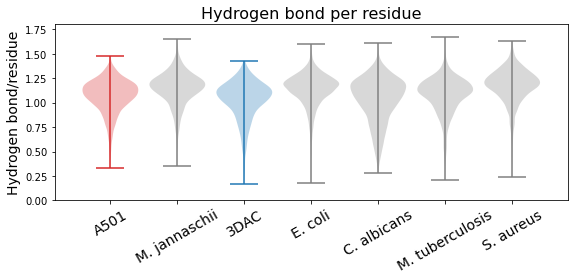

In [5]:
plt.figure(figsize=(8,4))


for i in range(len(df_list)):
    parts = plt.violinplot(df_list[i]["hydrogen_bond"].to_numpy()/df_list[i]["sequence length"].to_numpy(),positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list[i])
    parts['cbars'].set_color(color_list[i])
    parts['cmaxes'].set_color(color_list[i])
    parts['cmins'].set_color(color_list[i])




plt.xlim(-0.5,0.5+0.6*(len(df_list)-1))
plt.ylim(0,1.8)

plt.title("Hydrogen bond per residue",fontsize=16)
plt.ylabel("Hydrogen bond/residue",fontsize=14)
plt.xticks(np.arange(0,0.6*(len(df_list)-1)+0.1,0.6),tick_list,fontsize=14,rotation=30)
plt.tight_layout()

plt.savefig("Figure/Figure_hydrogen_bond.pdf")
plt.savefig("Figure/Figure_hydrogen_bond.png")

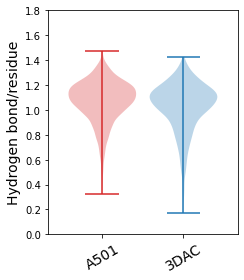

In [16]:
plt.figure(figsize=(3.5,4))


for i in range(len(df_list_paper)):
    parts = plt.violinplot(df_list_paper[i]["hydrogen_bond"].to_numpy()/df_list_paper[i]["sequence length"].to_numpy(),positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list_paper[i])
    parts['cbars'].set_color(color_list_paper[i])
    parts['cmaxes'].set_color(color_list_paper[i])
    parts['cmins'].set_color(color_list_paper[i])




plt.xlim(-0.4,0.4+0.6*(len(df_list_paper)-1))
plt.ylim(0,1.8)

# plt.title("Hydrogen bond per residue",fontsize=16)
plt.ylabel("Hydrogen bond/residue",fontsize=14)
plt.xticks(np.arange(0,0.6*(len(df_list_paper)-1)+0.1,0.6),tick_list_paper,fontsize=14,rotation=30)
plt.tight_layout()

plt.savefig("Figure/Figure_hydrogen_bond_paper.pdf")
plt.savefig("Figure/Figure_hydrogen_bond_paper.png")

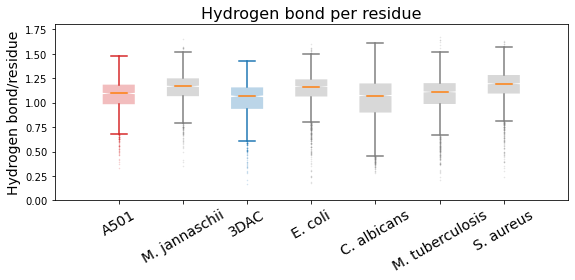

In [6]:
plt.figure(figsize=(8,4))


for i in range(len(df_list)):
    box = plt.boxplot(df_list[i]["hydrogen_bond"].to_numpy()/df_list[i]["sequence length"].to_numpy(),notch=True,positions=[0+0.3*i],sym='k.',patch_artist=True)

    for parts in box['boxes']:
        parts.set_color(color_list[i])
        parts.set_alpha(0.3)
        parts.set_edgecolor("None")
    box['whiskers'][0].set_color(color_list[i])
    box['whiskers'][0].set_linewidth(1.5)
    box['whiskers'][1].set_color(color_list[i])
    box['whiskers'][1].set_linewidth(1.5)
    box['caps'][0].set_color(color_list[i])
    box['caps'][0].set_linewidth(1.5)
    box['caps'][1].set_color(color_list[i])
    box['caps'][1].set_linewidth(1.5)
    box['medians'][0].set_color("tab:orange")
    box['medians'][0].set_linewidth(1.5)
    box['fliers'][0].set_markeredgecolor("None")
    box['fliers'][0].set_markerfacecolor(color_list[i])
    box['fliers'][0].set_markersize(3)
    box['fliers'][0].set_alpha(0.2)


plt.xlim(-0.3,0.3*len(df_list))
plt.ylim(0,1.8)

plt.title("Hydrogen bond per residue",fontsize=16)
plt.ylabel("Hydrogen bond/residue",fontsize=14)
plt.xticks(np.arange(0,0.3*(len(df_list)-1)+0.1,0.3),tick_list,fontsize=14,rotation=30,ha="center")
plt.tight_layout()

plt.savefig("Figure/Figure_hydrogen_bond_box.pdf")
plt.savefig("Figure/Figure_hydrogen_bond_box.png")

In [7]:
print(stats.ranksums(df_A501[df_A501["sequence length"].notnull()]["hydrogen_bond"]/df_A501[df_A501["sequence length"].notnull()]["sequence length"],df_3DAC[df_3DAC["sequence length"].notnull()]["hydrogen_bond"]/df_3DAC[df_3DAC["sequence length"].notnull()]["sequence length"]))


RanksumsResult(statistic=6.032849322970527, pvalue=1.6109361115322535e-09)


In [8]:
print(stats.ranksums(df_A501[df_A501["sequence length"].notnull()]["hydrogen_bond"]/df_A501[df_A501["sequence length"].notnull()]["sequence length"],df_Ecol[df_Ecol["sequence length"].notnull()]["hydrogen_bond"]/df_Ecol[df_Ecol["sequence length"].notnull()]["sequence length"]))


RanksumsResult(statistic=-16.64804120127974, pvalue=3.1266991080406846e-62)


In [9]:
print(stats.ranksums(df_3DAC[df_3DAC["sequence length"].notnull()]["hydrogen_bond"]/df_3DAC[df_3DAC["sequence length"].notnull()]["sequence length"],df_Ecol[df_Ecol["sequence length"].notnull()]["hydrogen_bond"]/df_Ecol[df_Ecol["sequence length"].notnull()]["sequence length"]))


RanksumsResult(statistic=-20.49463264722836, pvalue=2.4039394225531223e-93)
